In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("evolutionary.csv")
df

,Gen Number,ID,Fitness,Weights
0,0,6,0.000022,"[-0.16404120364130415, 0.685501526070116, 0.05..."
1,0,7,0.000019,"[0.9465410350652583, 0.03410227197040472, -0.3..."
2,0,10,0.000017,"[0.21745511819155028, 0.04119066021921847, 0.9..."
3,0,8,0.000013,"[0.4276412056239227, 0.24048943737896789, -0.2..."
4,0,5,0.000010,"[-0.2149763633527697, -0.3077721576229857, -0...."
5,0,9,0.000009,"[0.757731966508038, 0.6948162797311697, 0.6147..."
6,0,2,0.000009,"[-0.6920253084911796, -0.5823079599248215, -0...."
7,0,4,0.000009,"[-0.40192531491264205, 0.15290298477104747, 0...."
8,0,1,0.000009,"[-0.9075348701318955, 0.427041307035708, -0.20..."
9,0,3,0.000008,"[-0.4274488864852577, -0.7342674482619236, 0.6..."


In [3]:
max_per_gen = df.groupby("Gen Number", group_keys=False).apply(
    lambda group: group[group["Fitness"] == group["Fitness"].max()],
    include_groups=False
).reset_index()

mean_per_gen = df.groupby("Gen Number", group_keys=False).apply(
    lambda group: group.assign(Fitness=group["Fitness"].mean()),
    include_groups=False
).reset_index()
mean_per_gen = mean_per_gen.iloc[::10].reset_index(drop=True)

In [4]:
mean_per_gen

,index,ID,Fitness,Weights
0,0,6,0.000013,"[-0.16404120364130415, 0.685501526070116, 0.05..."
1,10,12,0.003115,"[0.7757669121933908, 0.035762588344306234, -0...."
2,20,12,0.003154,"[0.7757669121933908, 0.035762588344306234, -0...."
3,30,12,0.005418,"[0.7757669121933908, 0.035762588344306234, -0...."
4,40,12,0.005011,"[0.7757669121933908, 0.035762588344306234, -0...."


In [5]:
def plot_graph(x_values, y_values, title):
    # Optional: set a nice style
    plt.style.use("tableau-colorblind10")  # or 'ggplot', 'bmh', 'fivethirtyeight', etc.

    # Create your figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))  # you can adjust the size

    # Plot something
    ax.plot(x_values, y_values, label='Label', color='blue', marker='o')

    # Add titles and labels
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('X Axis Label', fontsize=12)
    ax.set_ylabel('Y Axis Label', fontsize=12)

    # Grid, legend, etc.
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()
    ax.tick_params(axis='both', labelsize=10)

    # Optional: annotate points
    # ax.annotate('Note', xy=(x, y), xytext=(x+1, y+1), arrowprops=dict(arrowstyle='->'))

    # Save or show
    plt.tight_layout()
    plt.show()  # Show the plot


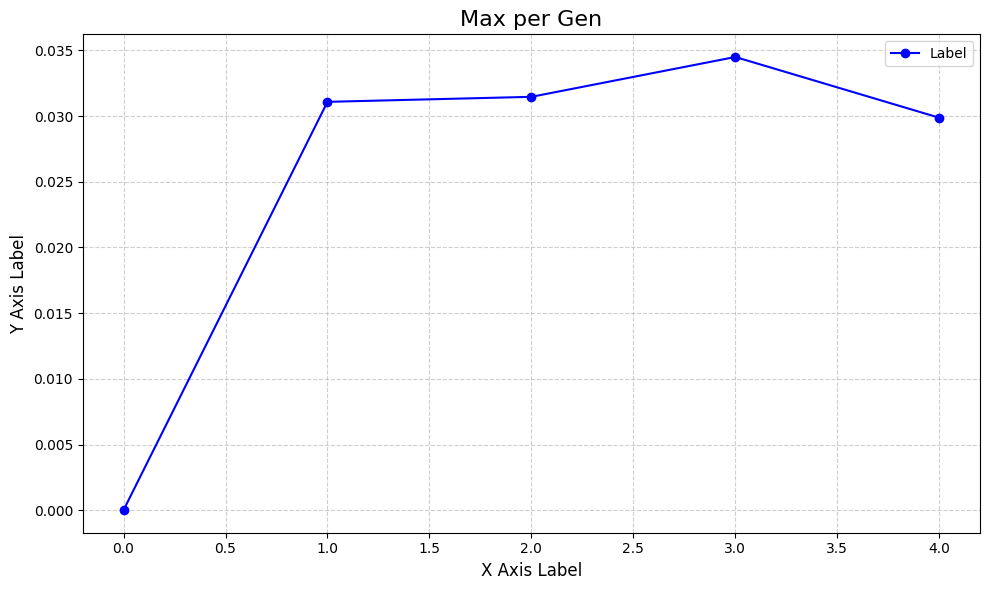

In [6]:
x_values = max_per_gen.index
y_values = max_per_gen["Fitness"]

plot_graph(x_values, y_values, "Max per Gen")

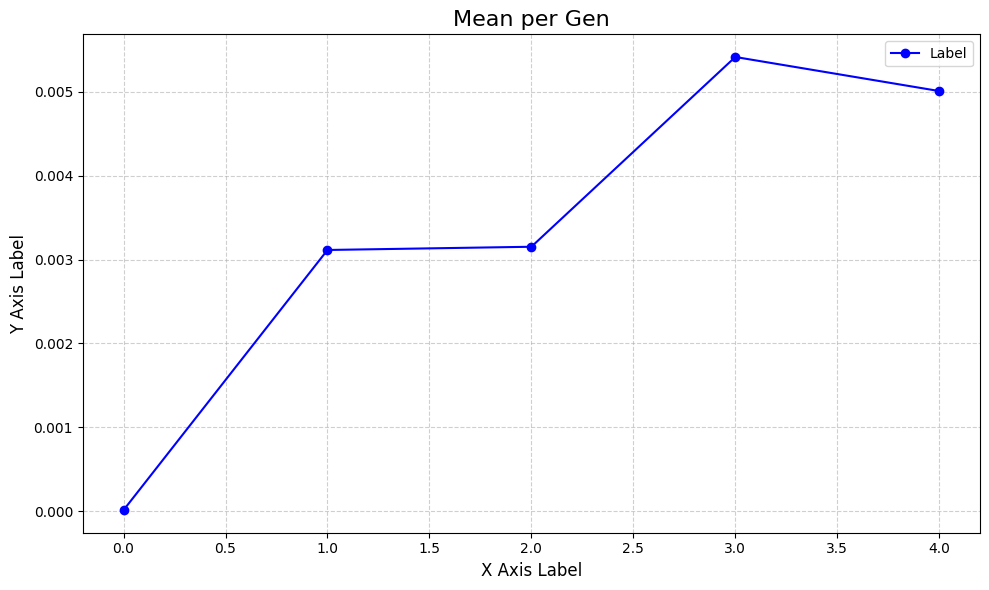

In [7]:
x_values = mean_per_gen.index
y_values = mean_per_gen["Fitness"]

plot_graph(x_values, y_values, "Mean per Gen")